In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Evaluation creterions

In [2]:
common_metrics = [
            "Exploration Face loss",
            "Exploration Edge loss",
            "Exploration Chamfer loss",
            "Map Face loss",
            "Map Edge loss",
            "Map Chamfer loss",
            "Exploration completeness",
            "Artifacts Exploration completeness",
            "Detections score",
            "Total reward",
            "Total artifacts reward"
          ]

# worlds = ["simple_cave_01", "simple_cave_02", "simple_cave_03"]
worlds = ["simple_cave_03"]

paths = ['../data/bags/mapping_eval/metrics/']

### All experiments

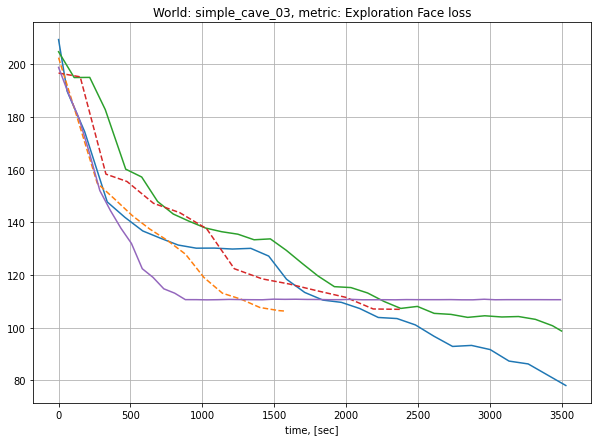

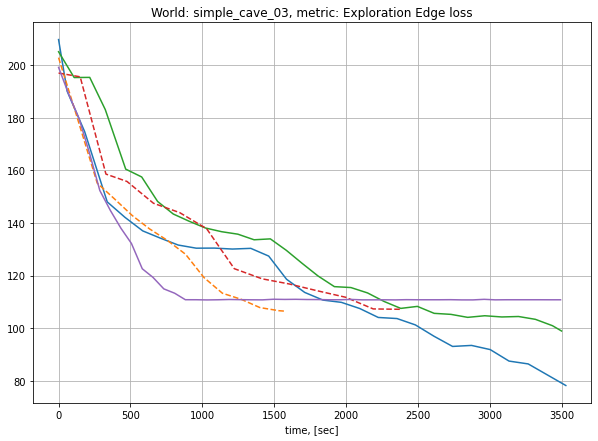

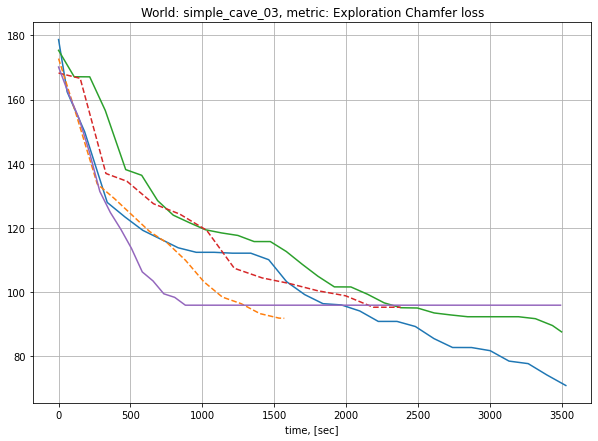

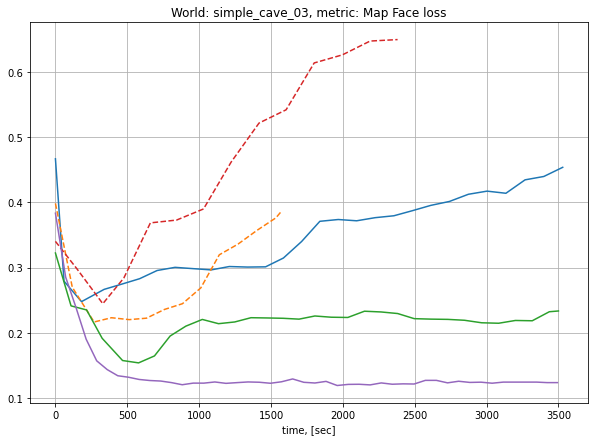

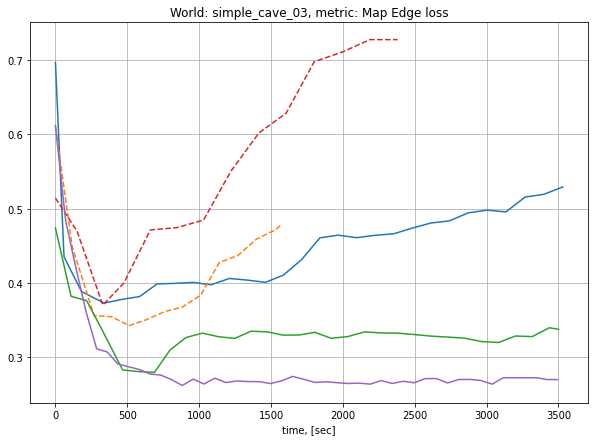

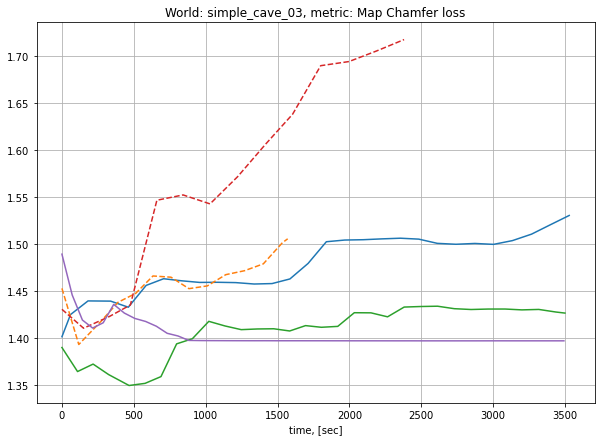

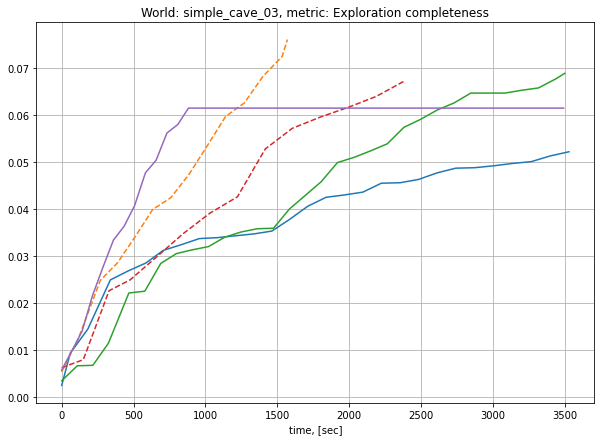

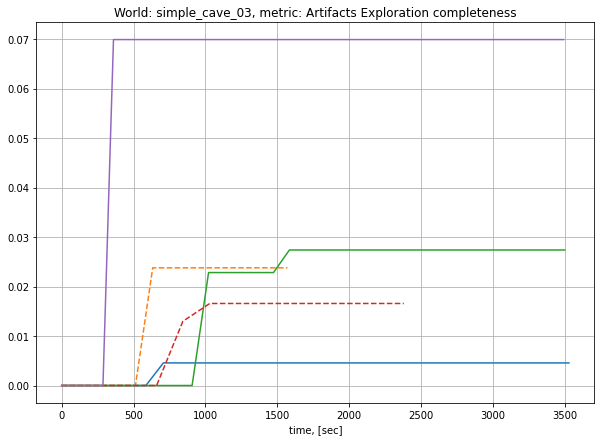

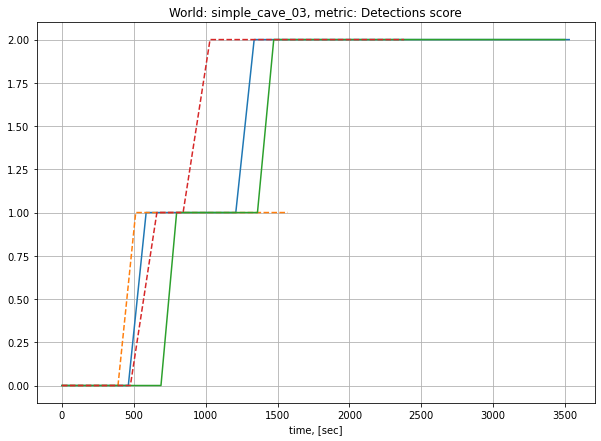

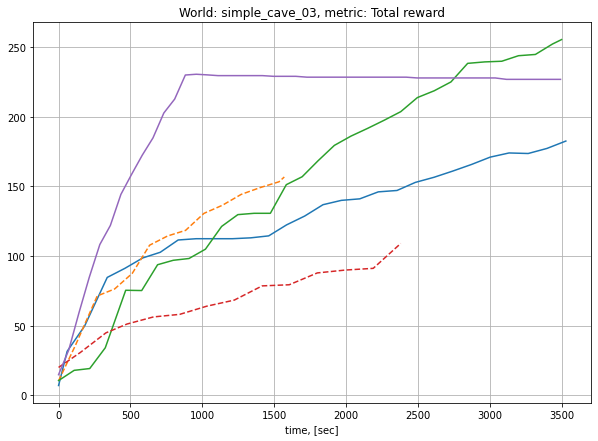

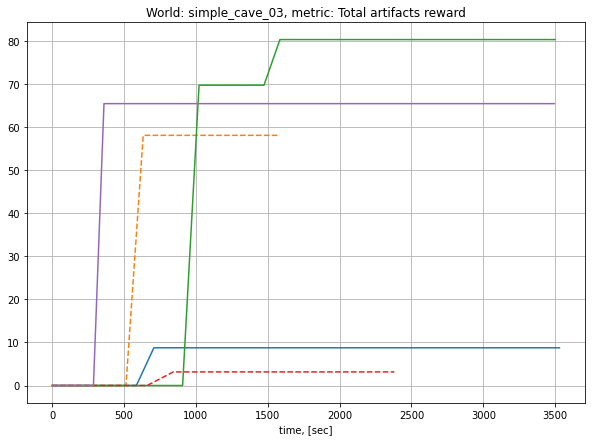

In [3]:
for world in worlds:
    for i, metric in enumerate(common_metrics):
        plt.figure(figsize=(10, 7))
        plt.title(f"World: {world}, metric: {metric}")
        for path in paths:
            xls_files = [file for file in os.listdir(path) if 'xls' in file and world in file]
            for file in xls_files:
                data = pd.read_excel(os.path.join(path, file))
                if metric in data and np.max(data['Exploration completeness']) > 0.05 and np.max(data[metric]) > 0:
                    ls = 'solid' if 'true' in file else 'dashed'
                    t = data['Time stamp'] - data['Time stamp'][0]
                    plt.plot(t, data[metric], linestyle=ls, label=file)
        plt.grid()
        plt.xlabel('time, [sec]')
        plt.show()
        plt.close()
        # plt.legend();

In [4]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss,Artifacts Exploration completeness,Detections score,N of constructed points,Total reward,Total artifacts reward
0,89.001422,198.877930,199.082504,170.134506,0.0057,0.383321,0.611716,1.489288,0.0,0,10000,14.934060,0.0
1,160.180928,188.612610,188.813385,161.646881,0.0098,0.285231,0.483604,1.446009,0.0,0,10000,32.735847,0.0
2,231.495288,179.458344,179.657318,154.081573,0.0140,0.238994,0.420408,1.419284,0.0,0,10000,59.530998,0.0
3,302.696746,166.593689,166.793793,143.770721,0.0215,0.190056,0.361036,1.410804,0.0,0,10000,84.817307,0.0
4,376.073926,152.116913,152.309006,131.350769,0.0276,0.156885,0.311533,1.416406,0.0,0,10000,108.310059,0.0


### Average results

In [5]:
# Reference: https://stackoverflow.com/questions/10058227/calculating-mean-of-arrays-with-different-lengths

def tolerant_mean(arrs):
    lens = [len(i) for i in arrs]
    if len(lens) == 0:
        return [], []
    arr = np.ma.empty((np.max(lens), len(arrs)))
    arr.mask = True
    for idx, l in enumerate(arrs):
        arr[:len(l),idx] = l
    return arr.mean(axis=-1), arr.std(axis=-1)

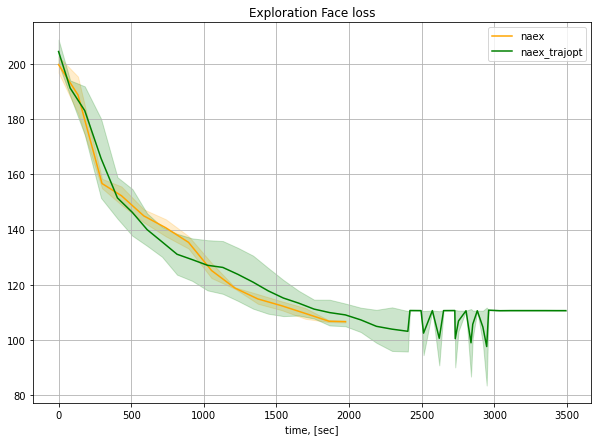

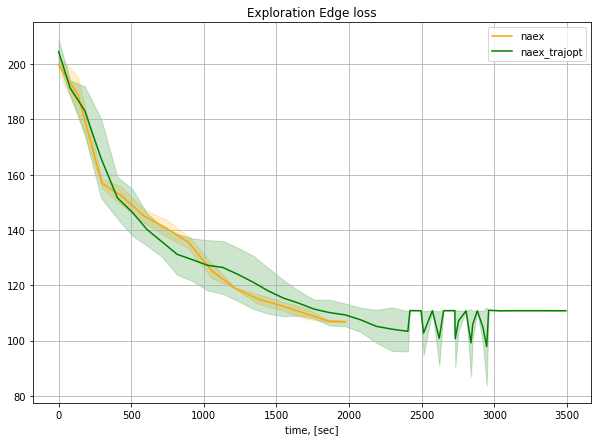

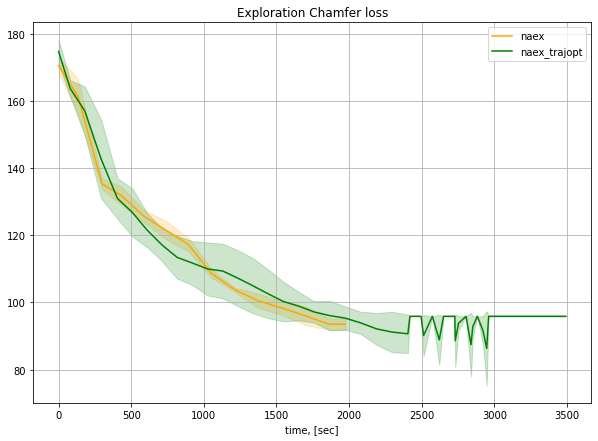

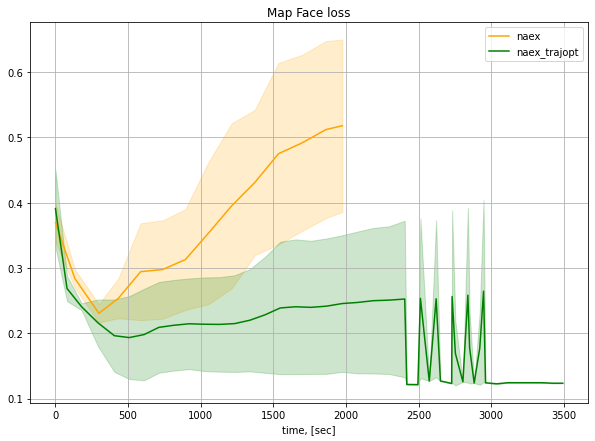

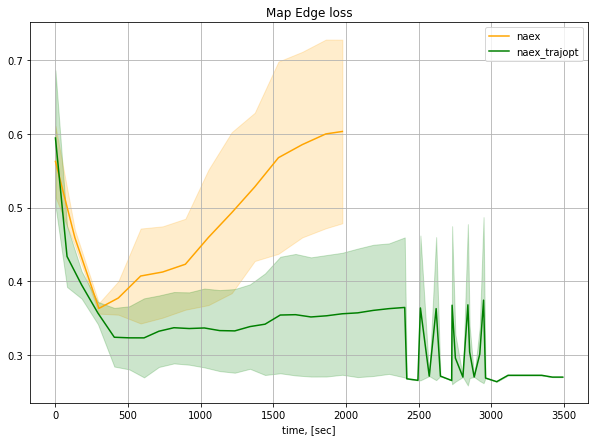

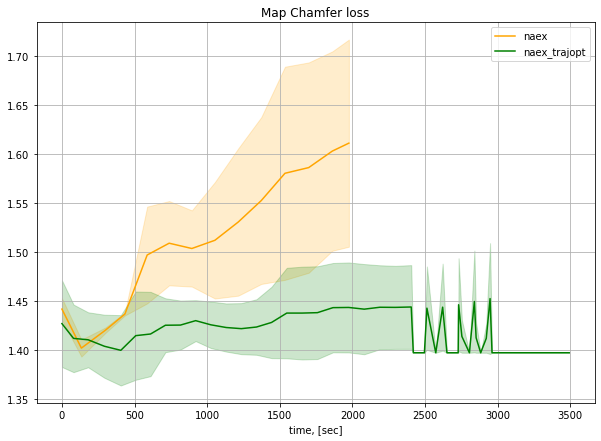

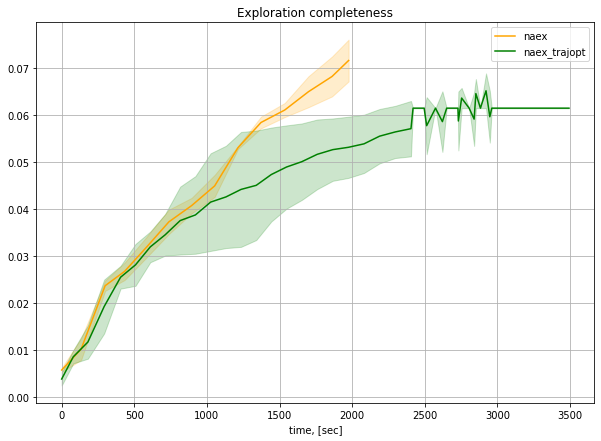

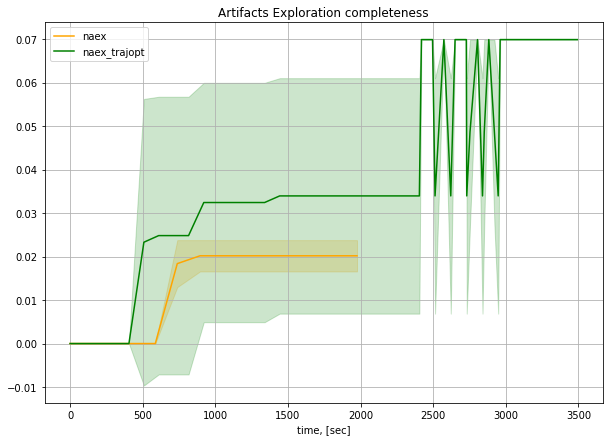

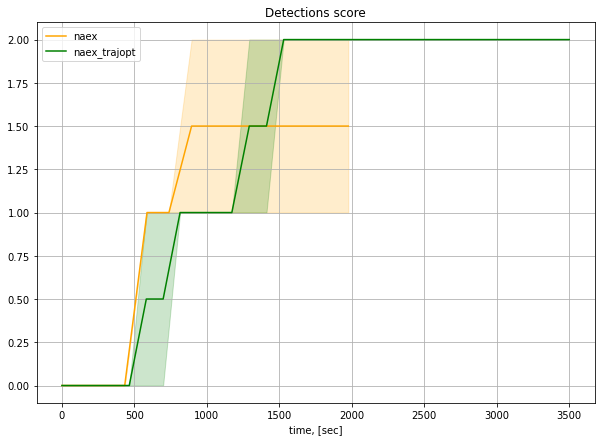

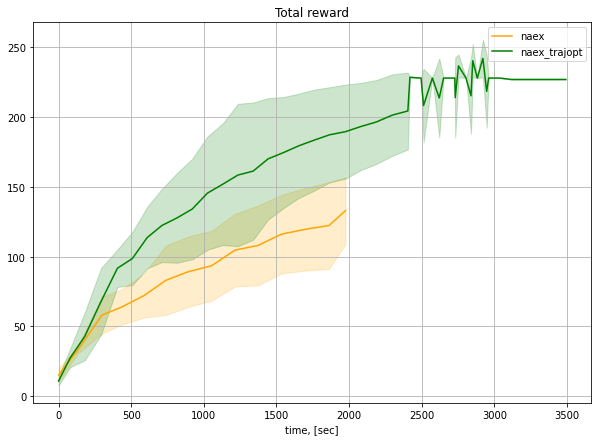

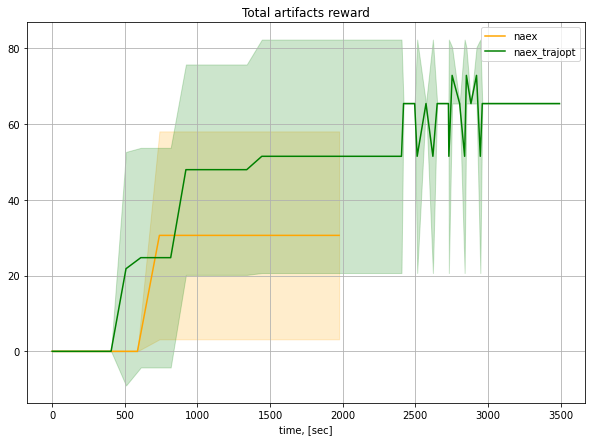

In [6]:
mean_metrics = {}
mean_metrics_trajopt = {}
for key in common_metrics:
    mean_metrics[key] = [[], [], []]  # mean, std, time
    mean_metrics_trajopt[key] = [[], [], []]  # mean, std, time

# add all metrics to corresponding dictionaries
for world in worlds:
    for i, metric in enumerate(common_metrics):
        for path in paths:
            xls_files = [file for file in os.listdir(path) if 'xls' in file and world in file]
            for file in xls_files:
                data = pd.read_excel(os.path.join(path, file))
                if metric in data and np.max(data['Exploration completeness']) > 0.05 and np.max(data[metric]) > 0:
                    t = data['Time stamp'] - data['Time stamp'][0]
                    if 'false' in file:
                        mean_metrics[metric][0].append(np.array(data[metric]))
                        mean_metrics[metric][2].append(np.array(t))
                        
                    elif 'true' in file:
                        mean_metrics_trajopt[metric][0].append(np.array(data[metric]))
                        mean_metrics_trajopt[metric][2].append(np.array(t))
                        

# average all metrics in dictionaries            
for metric in common_metrics:
    mean_metrics[metric][0], \
    mean_metrics[metric][1] = tolerant_mean(mean_metrics[metric][0])
    mean_metrics[metric][2], _ = tolerant_mean(mean_metrics[metric][2])
    
    mean_metrics_trajopt[metric][0], \
    mean_metrics_trajopt[metric][1] = tolerant_mean(mean_metrics_trajopt[metric][0])
    mean_metrics_trajopt[metric][2], _ = tolerant_mean(mean_metrics_trajopt[metric][2])
    
# mean metrics plots
for metric in common_metrics:
    plt.figure(figsize=(10, 7))
    plt.title(metric)
    
    value, std, t = mean_metrics[metric]
    if len(value) > 0:
        value = value[np.argsort(t)]
        std = std[np.argsort(t)]
        t = np.sort(t)
        plt.plot(t, value, color='orange', label='naex')
        plt.fill_between(t, value - std, value + std, color='orange', alpha=0.2)

    value, std, t = mean_metrics_trajopt[metric]
    if len(value) > 0:
        value = value[np.argsort(t)]
        std = std[np.argsort(t)]
        t = np.sort(t)
        plt.plot(t, value, color='green', label='naex_trajopt')
        plt.fill_between(t, value - std, value + std, color='green', alpha=0.2)
    
    plt.grid()
    plt.xlabel('time, [sec]')
    plt.legend()
    plt.show()
    plt.close()